In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
pd.set_option('display.max_columns', 120)
pd.set_option("display.max_rows", 120)
np.set_printoptions(threshold=np.inf)  # Display all the elements in the array without '...'.
np.set_printoptions(linewidth=500)

# Of more than 30,000,000 rows. Take a subset of the data. 
# num_rows = 100000
num_rows = 1000000
# num_rows = 10000000

In [2]:
# Load the dataset. 

# On local.
# train_data = pd.read_csv("/Users/kei/.kaggle/competitions/expedia-hotel-recommendations/train.csv", nrows=num_rows)
# train_data = pd.read_csv("/Users/kei/.kaggle/competitions/expedia-hotel-recommendations/train.csv")
# test_data = pd.read_csv("/Users/kei/.kaggle/competitions/expedia-hotel-recommendations/test.csv", nrows=num_rows)
# ss_data = pd.read_csv("/Users/kei/.kaggle/competitions/expedia-hotel-recommendations/sample_submission.csv", nrows=num_rows)
# dest_data = pd.read_csv("/Users/kei/.kaggle/competitions/expedia-hotel-recommendations/destinations.csv", nrows=num_rows)

# On AWS. 
train_data = pd.read_csv("../competitions/expedia-hotel-recommendations/train.csv", nrows=num_rows)
# train_data = pd.read_csv("../competitions/expedia-hotel-recommendations/train.csv")
# test_data = pd.read_csv("../competitions/expedia-hotel-recommendations/test.csv", nrows=num_rows)
# test_data = pd.read_csv("../competitions/expedia-hotel-recommendations/test.csv")
# ss_data = pd.read_csv("../competitions/expedia-hotel-recommendations/sample_submission.csv", nrows=num_rows)
# dest_data = pd.read_csv("../competitions/expedia-hotel-recommendations/destinations.csv", nrows=num_rows)

print('Total number of records of train_data: ', len(train_data))
# print('Total number of records of test_data: ', len(test_data))
display(train_data.head(10))
# display(test_data.head(10))
# display(ss_data.head(10))
# display(dest_data.head(10))

Total number of records of train_data:  1000000


,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-27,2014-08-31,2,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,9,2014-08-29,2014-09-02,2,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,9,2014-08-29,2014-09-02,2,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,21
5,2014-08-09 18:13:12,2,3,66,442,35390,911.5142,93,0,0,3,2014-11-23,2014-11-28,2,0,1,14984,1,0,1,2,50,1457,92
6,2014-07-16 09:42:23,2,3,66,189,10067,NaN,501,0,0,2,2014-08-01,2014-08-02,2,0,1,8267,1,0,2,2,50,675,41
7,2014-07-16 09:45:48,2,3,66,189,10067,NaN,501,0,1,2,2014-08-01,2014-08-02,2,0,1,8267,1,0,1,2,50,675,41
8,2014-07-16 09:52:11,2,3,66,189,10067,NaN,501,0,0,2,2014-08-01,2014-08-02,2,0,1,8267,1,0,1,2,50,675,69
9,2014-07-16 09:55:24,2,3,66,189,10067,NaN,501,0,0,2,2014-08-01,2014-08-02,2,0,1,8267,1,0,1,2,50,675,70


In [3]:
# train_data = train_data[:1000]
# train_data = train_data[:10000]  # This had caused an error. The date data might include strings and Timestamps. 

# Extract the rows whose 'is_booking' is '1'. 
train_data = train_data[train_data.is_booking == 1]
len(train_data)

82096

In [4]:
# Delete rows that include NaN.
train_data_nandropped = train_data.dropna()
train_data = pd.DataFrame(data = train_data_nandropped)
len(train_data)

54004

In [5]:
# res = train_data.groupby('user_id')['hotel_cluster'].value_counts()
# display(res.head(20))

In [6]:
grouped = train_data.groupby('hotel_cluster')
print("Number of hotel clusters: {}".format(len(grouped)))
grouped.size().head(10)

Number of hotel clusters: 100


hotel_cluster
0    362
1    816
2    729
3    178
4    715
5    652
6    832
7    683
8    310
9    827
dtype: int64

In [7]:
# See top 10. 
hotel_cluster_count = train_data['hotel_cluster'].value_counts()
hotel_cluster_count.head(10)

91    2806
48    1930
42    1635
28    1307
18    1218
95    1186
59    1121
50    1113
16    1085
21     990
Name: hotel_cluster, dtype: int64

most_freq_cnt:  2806
least_freq_cnt:  36


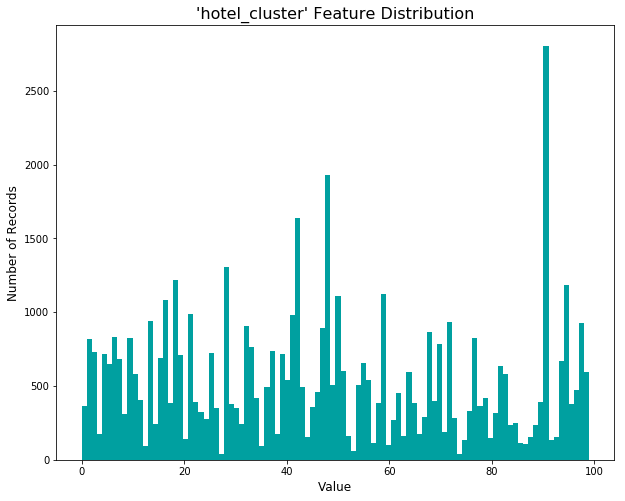

In [8]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,8))
plt.hist(train_data['hotel_cluster'], bins=100, color='#00A0A0')
most_freq_cnt = hotel_cluster_count.max()
least_freq_cnt = hotel_cluster_count.min()
print("most_freq_cnt: ", most_freq_cnt)
print("least_freq_cnt: ", least_freq_cnt)

plt.title("'hotel_cluster' Feature Distribution", fontsize = 16)
plt.ylabel("Number of Records", fontsize = 12)
plt.xlabel("Value", fontsize = 12)
fig.show()

In [9]:
# Create target data. 
# hotel_cluster_raw = train_data['hotel_cluster']
# print(len(hotel_cluster_raw))
# hotel_cluster_raw.head(10)
# 1985514
#
# 1       1
# 79     95
# 81     95
# 83     95
# 128    38
# 133    81
# 372    91
# 401    54
# 408    42
# 410    42

In [10]:
# Create training data. 


# train_data['srch_ci'].head(5)  # 0    2014-08-27, ... 

# Create a new column, 'length_stay', which is equal to 'srch_co' - 'srch_ci'. (Before the tip)
# from datetime import datetime
# train_data['srch_ci'] = train_data['srch_ci'].dropna()\
#     .apply(lambda x: x if isinstance(x, datetime) else datetime.strptime(x[:10], "%Y-%m-%d"))
# train_data['srch_co'] = train_data['srch_co'].dropna()\
#     .apply(lambda x: x if isinstance(x, datetime) else datetime.strptime(x[:10], "%Y-%m-%d"))
# train_data['length_stay'] = (train_data['srch_co'] - train_data['srch_ci']).dropna().apply(lambda x: x.days)

# Create a new column, 'length_stay', which is equal to 'srch_co' - 'srch_ci'. (After the tip)
train_data["srch_ci"] = pd.to_datetime(train_data["srch_ci"], format='%Y-%m-%d', errors="coerce")
train_data["srch_co"] = pd.to_datetime(train_data["srch_co"], format='%Y-%m-%d', errors="coerce")
# train_data["length_stay"] = (train_data["srch_co"].dropna() - train_data["srch_ci"].dropna()).astype('timedelta64[D]')
train_data["length_stay"] = (train_data["srch_co"] - train_data["srch_ci"]).astype('timedelta64[D]')


train_data['length_stay'].head(20)

# To see if there are outliers. 
# train_data['length_stay'].astype(np.float)
# train_data[train_data['length_stay'] >= 15]

1      4.0
79     5.0
81     5.0
83     3.0
128    1.0
133    1.0
372    2.0
401    2.0
408    2.0
410    2.0
414    1.0
753    1.0
754    6.0
755    5.0
756    4.0
759    5.0
763    3.0
764    3.0
768    1.0
774    2.0
Name: length_stay, dtype: float64

In [11]:
# Drop columns. 
drop_columns = ['date_time', 'user_id', 'srch_ci', 'srch_co']
# drop_columns = ['date_time', 'srch_ci', 'srch_co']
# drop_columns = ['srch_ci', 'srch_co']
features_raw = train_data.drop(drop_columns, axis=1)
len(features_raw)

54004

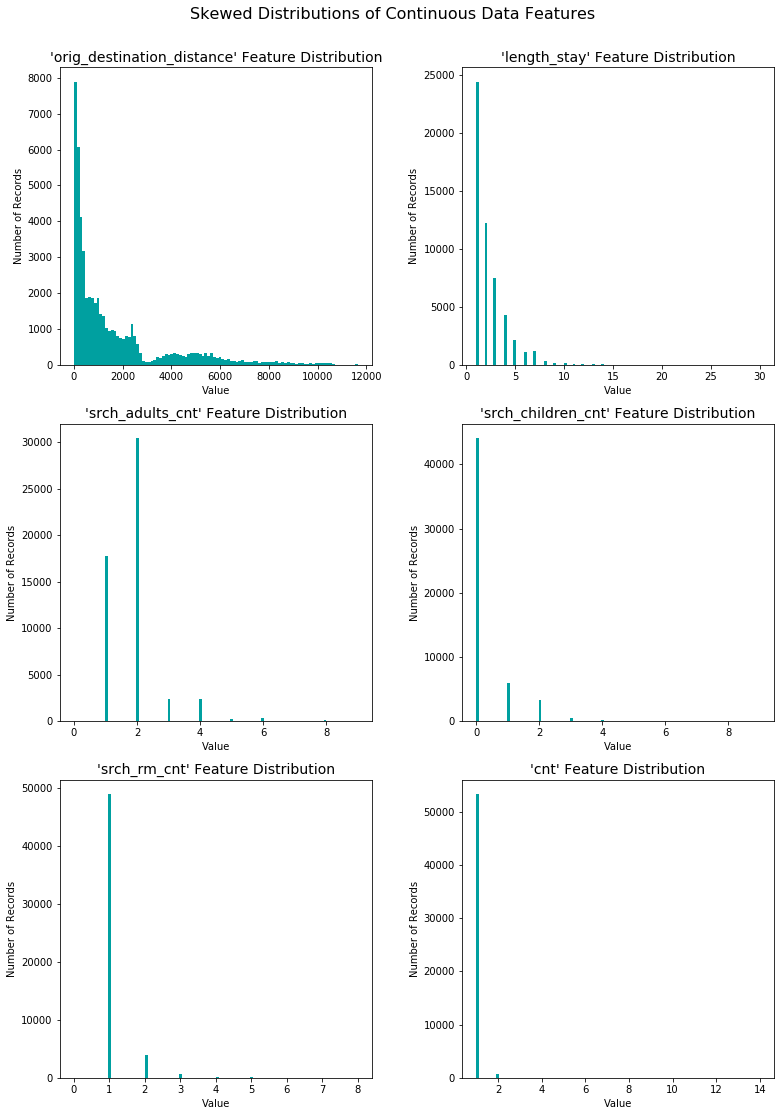

In [12]:
# Display the distribution of 'orig_destination_distance'. 
numerical_data = ['orig_destination_distance', 'length_stay', 'srch_adults_cnt', 'srch_children_cnt', \
                   'srch_rm_cnt', 'cnt']
vs.distribution(train_data, numerical_data)

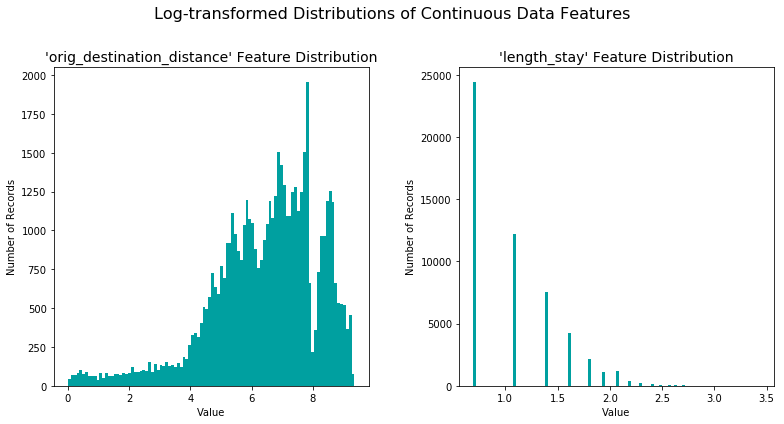

In [13]:
# Log-transform the skewed features
skewed = ['orig_destination_distance', 'length_stay']
features_log_transformed = pd.DataFrame(data=features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, skewed, transformed=True)

In [14]:
# Normalization. 

from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features. 
scaler = MinMaxScaler() # default=(0, 1)
features_log_transformed = features_log_transformed.dropna()  #  len: 1985514 -> 1985512
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical_data] = scaler.fit_transform(features_log_transformed[numerical_data].dropna())

# Show an example of a record with scaling applied
print("total number of rows: ", len(features_log_minmax_transform))
display(features_log_minmax_transform.head(10))

total number of rows:  54004


,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,length_stay
1,2,3,66,348,48862,0.823628,0,1,9,0.222222,0.000000,0.125,8250,1,1,0.0,2,50,628,1,0.334310
79,2,3,66,462,41898,0.833687,0,1,1,0.333333,0.000000,0.250,12009,1,1,0.0,2,50,680,95,0.400831
81,2,3,66,462,41898,0.833687,0,1,1,0.222222,0.000000,0.125,12009,1,1,0.0,2,50,680,95,0.400831
83,2,3,66,462,41898,0.833687,0,1,1,0.222222,0.000000,0.125,12009,1,1,0.0,2,50,680,95,0.252896
128,2,3,66,174,40365,0.965849,0,0,0,0.222222,0.000000,0.250,1571,3,1,0.0,3,5,89,38,0.000000
133,2,3,66,174,21855,0.965041,0,0,1,0.111111,0.000000,0.125,12861,5,1,0.0,3,5,89,81,0.000000
372,2,3,66,174,16634,0.156229,0,0,1,0.222222,0.222222,0.125,61531,6,1,0.0,2,50,1241,91,0.147935
401,2,3,66,174,46432,0.505564,0,0,1,0.222222,0.000000,0.125,11835,1,1,0.0,2,50,633,54,0.147935
408,2,3,66,189,2871,0.839247,1,0,9,0.333333,0.000000,0.125,4777,3,1,0.0,2,50,967,42,0.147935
410,2,3,66,189,2871,0.839247,1,0,9,0.333333,0.000000,0.125,4777,3,1,0.0,2,50,967,42,0.147935


In [15]:
# Create target data. 
hotel_cluster_raw = features_log_transformed['hotel_cluster']
features_log_transformed.drop('hotel_cluster', axis=1)
print(len(hotel_cluster_raw))
print(hotel_cluster_raw.head(10))

# Drop hotel_cluster column from features data. 
features_log_minmax_transform = features_log_minmax_transform.drop('hotel_cluster', axis=1)

54004
1       1
79     95
81     95
83     95
128    38
133    81
372    91
401    54
408    42
410    42
Name: hotel_cluster, dtype: int64


In [16]:
# One-hot encoding...

categorical_columns = ['site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', \
                                          'channel', 'srch_destination_id', 'srch_destination_type_id', 'hotel_continent', 'hotel_country', 'hotel_market']
# categorical_columns = ['site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'user_id', \
#                                           'channel', 'srch_destination_id', 'srch_destination_type_id', 'hotel_continent', 'hotel_country', 'hotel_market']

for c in categorical_columns:
    print(c)
    print(features_log_minmax_transform[c].value_counts())
    print()

site_name
2     42908
11     4651
34     1809
8      1380
13     1226
23     1023
37      328
40      163
10      145
26      124
24       80
19       37
17       29
25       28
22       16
30       13
28       10
18        7
33        4
6         4
32        4
9         3
41        3
16        2
21        2
27        2
35        1
20        1
15        1
Name: site_name, dtype: int64

posa_continent
3    49571
1     2628
4     1393
0      273
2      139
Name: posa_continent, dtype: int64

user_location_country
66     42192
205     6475
77      1447
46      1330
1       1162
215      738
182      332
63       220
0         47
69        44
16         5
55         3
43         2
130        2
85         2
141        2
202        1
Name: user_location_country, dtype: int64

user_location_region
174     9245
442     3402
220     2963
348     2739
354     2549
462     2265
258     1548
155     1399
135     1315
363     1295
448     1219
226     1127
184     1115
311     1113
337     1027
318

In [17]:
# Before one-hot encoding, encode all rare categories 
#   to the same feature ("RARE_VALUE") in order to reduce dimensions. 

# features_log_minmax_transform\
#       .loc[features_log_minmax_transform['site_name']\
#            .value_counts()[features_log_minmax_transform['site_name']].values < 20, 'site_name'] = 'RARE_VALUE'
# print(features_log_minmax_transform['site_name'].value_counts())

rare_threshold = 20
# rare_threshold = 200

for c in categorical_columns:
    features_log_minmax_transform \
      .loc[features_log_minmax_transform[c].value_counts()[features_log_minmax_transform[c]].values < rare_threshold, c] = 'RARE_VALUE'

for c in categorical_columns:
    print(c)
    print(features_log_minmax_transform[c].value_counts())
    print()

site_name
2             42908
11             4651
34             1809
8              1380
13             1226
23             1023
37              328
40              163
10              145
26              124
24               80
RARE_VALUE       73
19               37
17               29
25               28
Name: site_name, dtype: int64

posa_continent
3    49571
1     2628
4     1393
0      273
2      139
Name: posa_continent, dtype: int64

user_location_country
66            42192
205            6475
77             1447
46             1330
1              1162
215             738
182             332
63              220
0                47
69               44
RARE_VALUE       17
Name: user_location_country, dtype: int64

user_location_region
174           9245
442           3402
220           2963
348           2739
354           2549
462           2265
258           1548
155           1399
135           1315
363           1295
448           1219
226           1127
184           1115


In [18]:
# Convert type 'int' to 'string' in the categorical columns. 
features_log_minmax_transform[categorical_columns] = \
    features_log_minmax_transform[categorical_columns].astype('str')

# One-hot encoding. 
features_final = pd.get_dummies(features_log_minmax_transform)
# Print the number of features after one-hot encoding
columns = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(columns)))
print()
# See the encoded feature names.
# print(columns)

1729 total features after one-hot encoding.



In [19]:
# Split the data into a training dataset and test dataset. 

# Import train_test_split
from sklearn.model_selection import train_test_split

print("features_final: ", len(features_final))
print("hotel_cluster_raw: ", len(hotel_cluster_raw))


X_train, X_validation, y_train, y_validation = train_test_split(features_final, 
                                                    hotel_cluster_raw, 
                                                    test_size=0.2, 
                                                    random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_validation.shape[0]))

features_final:  54004
hotel_cluster_raw:  54004
Training set has 43203 samples.
Testing set has 10801 samples.


In [20]:
# Random model. 

from sklearn.metrics import fbeta_score, accuracy_score

prediction_random = np.random.randint(100, size=len(y_validation))
accuracy_random = accuracy_score(y_validation, prediction_random)

print("Random Model")
print("Accuracy: {:.5f}".format(accuracy_random))

Random Model
Accuracy: 0.01037


In [21]:
# Create a training and predicting pipeline. 
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: hotel_cluster training set
       - X_test: features testing set
       - y_test: hotel_cluster testing set
    '''
    
    results = {}
    
    # Train the learner. 
    start = time() 
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() 
    results['train_time'] = end - start
        
    # Make the predictions. 
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() 
    results['pred_time'] = end - start

    # Compute precision in micro averaging. 
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)

    return results    
    
    
    # Create a confusion matrix
#     cm_train = confusion_matrix(y_train[:300], predictions_train)
#     cm_test = confusion_matrix(y_test, predictions_test)
    
    # Display some predicted samples. 
    print("Prediction samples: {} ".format(predictions_test[:20]))
    print("True hotel clusters: {} ".format(y_test.values[:20]))
    print()
    
    
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
#     print("Confusion Matrix: ")
#     print(cm_test)
    print()
    
#     return results

In [22]:
# # Import the three supervised learning models from sklearn
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier 
# from sklearn import linear_model
# from sklearn.svm import SVC

# # Initialize the three models. 
# clf_A = GaussianNB()
# clf_B = RandomForestClassifier(random_state=0)
# # clf_C = SVC(random_state=0)
# clf_C = linear_model.LogisticRegression(random_state=0)

# Prepare different sizes of the data. 
samples_100 = len(y_train)
samples_10 = int(samples_100 / 10)
samples_1 = int(samples_100 / 100)

# Collect results on the learners. 
results = {}

# # One model. 
# # clf_name = clf_B.__class__.__name__
# # results[clf_name] = {}
# # results[clf_name] = train_predict(clf_B, samples_100, X_train, y_train, X_test, y_test)

# # Two models. 
# # for clf in [clf_A, clf_B]:
# #     clf_name = clf.__class__.__name__
# #     results[clf_name] = {}
# #     results[clf_name] = train_predict(clf, samples_100, X_train, y_train, X_test, y_test)

# # Three models. 
# # for clf in [clf_A, clf_B, clf_C]:
# #     clf_name = clf.__class__.__name__
# #     results[clf_name] = {}
# #     results[clf_name] = train_predict(clf, samples_100, X_train, y_train, X_test, y_test)

# # Three models with various sizes of data. 
# for clf in [clf_A, clf_B, clf_C]:
#     clf_name = clf.__class__.__name__
#     results[clf_name] = {}
#     for i, samples in enumerate([samples_1, samples_10, samples_100]):
#         results[clf_name][i] = \
#         train_predict(clf, samples, X_train, y_train, X_test, y_test)


# # Run metrics visualization for the three supervised learning models chosen
# # vs.evaluate(results, accuracy, fscore)

In [23]:
# # From Review 2
# # print()
# for i in results.items():
#     print(i[0])
#     display(pd.DataFrame(i[1]).round(4).rename(columns={0:'1%', 1:'10%', 2:'100%'}))
#     print()
#     print()

In [24]:
# #  Accuracy with 100% data. 

# acc_list = []
# for key in results.keys():
#     print(key)
# #     print(results.get(key))
#     acc = results.get(key)[2].get('acc_test')
# #     print(acc)
#     print("Accuracy: {:.5f}".format(acc))
#     print()

In [25]:
# # Grid Search. 

# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer

# # clf = RandomForestClassifier(random_state=0)

# # Create parameters. 
# # parameters = {'n_estimators': [16, 32, 64]
# #                          ,'max_depth': [64, 128, 256]
# #                          ,'max_features': [160, 320, 640]}
#     # AWS, p2.xlarge, num_rows: 1000000, it　took 1 hour 30 min.  

# # Perform grid search on the classifier.
# # grid_obj = GridSearchCV(clf, parameters)

# # Fit the grid search object to the training data. 
# # grid_fit = grid_obj.fit(X_train, y_train)

# # Get the estimator. 
# # clf_optimized = grid_fit.best_estimator_
# clf_optimized = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=256, max_features=640, max_leaf_nodes=None,
#             min_impurity_split=1e-07, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=64, n_jobs=1, oob_score=False, random_state=0,
#             verbose=0, warm_start=False)
# # num_rows: 1000000, accuracy: 0.2093
# print(clf_optimized)
# print()

# # Make predictions using the unoptimized and optimized model. 
# # predictions_unoptimized = (clf.fit(X_train, y_train)).predict(X_test)
# # predictions_unoptimized = acc


# start = time()
# clf_o = clf_optimized.fit(X_train, y_train)
# end = time() 
# training_time_full = end - start

# predictions_optimized = clf_o.predict(X_test)


# # Report the before-and-afterscores
# print("Unoptimized model\n------")
# # print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, predictions_unoptimized)))
# # print("Accuracy score on the testing data: {:.5f}".format(acc))
# print("\nOptimized Model\n------")
# print("Accuracy score on the testing data: {:.5f}".format(accuracy_score(y_test, predictions_optimized)))

# # n: 1000000, 30 minutes
# # Optimized Model
# # ------
# # Accuracy score on the testing data: 0.20933

# # n: 10000000
# # Unoptimized model
# # ------
# # Accuracy score on the testing data: 0.19804

# # Optimized Model
# # ------
# # Accuracy score on the testing data: 0.22665

In [26]:
# Cross Validation

# from sklearn.cross_validation import cross_val_score
# scores = cross_val_score(clf_optimized, features_final, hotel_cluster_raw, cv=3)
# print(scores)
# print(scores.mean())

# [0.11227545 0.11033946 0.11597752]
# 0.11286414307995389

In [27]:
# # Feature importances

# importances = clf_optimized.feature_importances_
# # print(importances)

In [28]:
# from sklearn.base import clone

# N = 10
# # Returns column names ordered by importance in descending order. 
# print(X_train.columns.values[(np.argsort(importances)[::-1])[:N]])

In [29]:
# X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:N]]]
# X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:N]]]

# clf_optimized_limited_features = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=256, max_features=min(N, 640), max_leaf_nodes=None,
#             min_impurity_split=1e-07, min_samples_leaf=1,
#             min_samples_split=2, min_weight_fraction_leaf=0.0,
#             n_estimators=64, n_jobs=1, oob_score=False, random_state=0,
#             verbose=0, warm_start=False)

# # Train on reduced features. 
# start = time()
# clf_olf = clf_optimized_limited_features.fit(X_train_reduced, y_train)
# end = time() 
# training_time_reduced = end - start

# # Make new predictions
# predictions_optimized_reduced = clf_olf.predict(X_test_reduced)

# # Report scores from the final model using both versions of data
# print("Final Model trained on full features\n------")
# print("Training Time: {:.3f}".format(training_time_full))
# print("Accuracy on testing data: {:.5f}".format(accuracy_score(y_test, predictions_optimized)))
# print("\nFinal Model trained on reduced features\n------")
# print("Training Time: {:.3f}".format(training_time_reduced))
# print("Accuracy on testing data: {:.5f}".format(accuracy_score(y_test, predictions_optimized_reduced)))

# # n: 1000000
# # Final Model trained on full data
# # ------
# # Training Time: 287.653
# # Accuracy on testing data: 0.20933

# # Final Model trained on reduced data
# # ------
# # Training Time: 19.957
# # Accuracy on testing data: 0.09481

In [30]:
# Stacking 

import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# from sklearn import datasets

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB 
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from mlxtend.classifier import StackingClassifier

# from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
# from mlxtend.plotting import plot_decision_regions

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)

clf_list = [clf1, clf2, clf3, sclf]

# Train and predict. 
for clf in clf_list:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_validation, y_validation)

GaussianNB


,1%,10%,100%
acc_test,0.0471,0.0689,0.0538
acc_train,0.9567,0.5600,0.1400
pred_time,12.9372,14.6773,14.8778
train_time,0.0167,0.1638,1.7835


StackingClassifier


,1%,10%,100%
acc_test,0.0240,0.0328,0.0502
acc_train,0.1567,0.1367,0.1467
pred_time,25.4912,138.1728,798.2947
train_time,0.5618,25.9766,1758.6165


RandomForestClassifier


,1%,10%,100%
acc_test,0.0496,0.0875,0.1817
acc_train,0.9967,0.9900,0.9833
pred_time,0.1966,0.2389,0.2777
train_time,0.0403,0.4684,9.0564


KNeighborsClassifier


,1%,10%,100%
acc_test,0.0469,0.0788,0.1752
acc_train,1.0000,1.0000,1.0000
pred_time,12.2349,121.8719,791.2949
train_time,0.0121,0.3004,7.8928


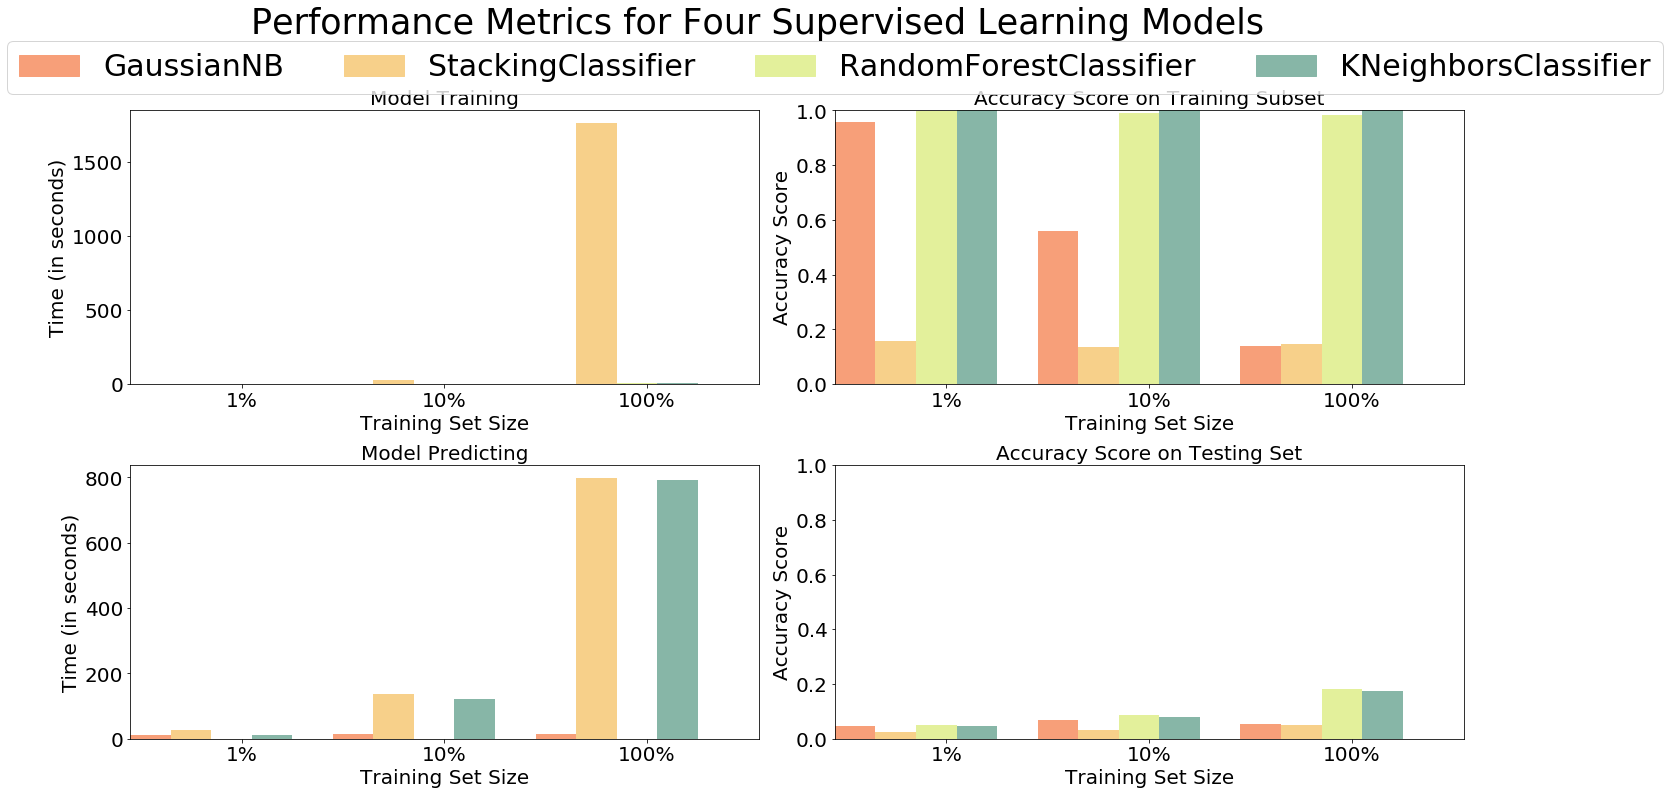

In [32]:
# import visuals as vs

# Show the results.    
for item in results.items():
    print(item[0])
#     print(item[1])
    display(pd.DataFrame(item[1]).round(4).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

# Visualize the results. 
vs.evaluate(results)

# fig = plt.figure(figsize=(10,8))
# gs = gridspec.GridSpec(2, 2)
# grid = itertools.product([0,1],repeat=2)

# clf_cv_mean = []
# clf_cv_std = []
# for clf, label, grd in zip(clf_list, label, grid):
     
#     scores = cross_val_score(clf, features_final, hotel_cluster_raw, cv=3, scoring='accuracy')
#     print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
#     clf_cv_mean.append(scores.mean())
#     clf_cv_std.append(scores.std())
    
#     clf.fit(features_final, hotel_cluster_raw)
#     ax = plt.subplot(gs[grd[0], grd[1]])
#     fig = plot_decision_regions(X=np.array(features_final), y=np.array(hotel_cluster_raw), clf=clf)
#     plt.title(label)

# plt.show()

# n: 1000000, 1h20m
# GaussianNB
# 1%	10%	100%
# acc_test	0.0471	0.0689	0.0538
# acc_train	0.9567	0.5600	0.1400
# pred_time	12.9372	14.6773	14.8778
# train_time	0.0167	0.1638	1.7835
# StackingClassifier
# 1%	10%	100%
# acc_test	0.0240	0.0328	0.0502
# acc_train	0.1567	0.1367	0.1467
# pred_time	25.4912	138.1728	798.2947
# train_time	0.5618	25.9766	1758.6165
# RandomForestClassifier
# 1%	10%	100%
# acc_test	0.0496	0.0875	0.1817
# acc_train	0.9967	0.9900	0.9833
# pred_time	0.1966	0.2389	0.2777
# train_time	0.0403	0.4684	9.0564
# KNeighborsClassifier
# 1%	10%	100%
# acc_test	0.0469	0.0788	0.1752
# acc_train	1.0000	1.0000	1.0000
# pred_time	12.2349	121.8719	791.2949
# train_time	0.0121	0.3004	7.8928

In [33]:
# # Plot classifier accuracy    
# plt.figure()
# (_, caps, _) = plt.errorbar(range(4), clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='-o', capsize=5)
# for cap in caps:
#     cap.set_markeredgewidth(1)                                                                                                                                
# plt.xticks(range(4), ['KNN', 'RF', 'NB', 'Stacking'])        
# plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble');
# plt.show()

In [34]:
# # Plot learning curves

# plt.figure()
# plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model=False, style='ggplot')
# plot_learning_curves(X_train, y_train, X_test, y_test, clf2, scoring='accuracy', print_model=False, style='ggplot')
# plt.show()

In [35]:
# # MLP

# from keras.utils import np_utils

# # print first ten (integer-valued) training labels
# print('Integer-valued labels:')
# # print(y_train[:10])

# # one-hot encode the labels
# y_train = np_utils.to_categorical(y_train, 100)
# y_test = np_utils.to_categorical(y_test, 100)

# # print first ten (one-hot) training labels
# print('One-hot labels:')
# # print(y_train[:10])

In [36]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout

# print(X_train.shape[1:])  # n: 1000000 -> (1729,)

# # define the model
# model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=X_train.shape[1:]))
# model.add(Dropout(0.2))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(100, activation='softmax'))

# # # summarize the model
# model.summary()

# # Train on 34562 samples, validate on 8641 samples
# # Test accuracy: 0.1385

In [37]:
# define the model
# model = Sequential()
# model.add(Dense(256, activation='relu', input_shape=X_train.shape[1:]))
# model.add(Dropout(0.4))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(100, activation='softmax'))

# # # summarize the model
# model.summary()

# Train on 34562 samples, validate on 8641 samples
# Test accuracy: 0.1290

In [38]:
# # compile the model
# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [39]:
# # evaluate test accuracy

# print(X_test.shape)
# print(y_test.shape)

# # keras requires numpy array inputs. 
# X_test = np.array(X_test)
# y_test = np.array(y_test)

# score = model.evaluate(X_test, y_test, verbose=0)
# accuracy = score[1]
# print('Test accuracy: %.4f' % accuracy)

In [40]:
# from keras.callbacks import ModelCheckpoint   

# X_train = np.array(X_train)
# y_train = np.array(y_train)

# # train the model
# checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
#                                verbose=1, save_best_only=True)

# # Early stopping.
# from keras.callbacks import EarlyStopping
# e_stop=EarlyStopping(monitor='val_loss', patience=15, verbose=2)

# hist = model.fit(X_train, y_train, batch_size=32, epochs=50,
#           validation_split=0.2, callbacks=[checkpointer, e_stop],
#           verbose=1, shuffle=True)

In [41]:
# # Display the process of learning. 
# plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
# plt.title('model history: Loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['loss', 'val_loss'], loc='center right')

# min_val_loss=min(hist.history['val_loss'])
# min_val_loss_index=hist.history['val_loss'].index(min_val_loss)
# text_loss='local min:{:.2}, {}'.format(min_val_loss, min_val_loss_index)
# plt.annotate(text_loss, xy=(min_val_loss_index, min_val_loss),  xycoords='data',
#             xytext=(0.5, 0.7), textcoords='axes fraction',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='right', verticalalignment='top',
#             )

# plt.show()

# # plt.plot(model_history.history['acc'])
# # plt.plot(model_history.history['val_acc'])
# # plt.title('model history: Accuracy')
# # plt.ylabel('accuracy')
# # plt.xlabel('epoch')
# # plt.legend(['acc', 'val_acc'], loc='center left')
# # plt.show()

In [42]:
# # load the weights that yielded the best validation accuracy
# model.load_weights('mnist.model.best.hdf5')

In [43]:
# # evaluate test accuracy
# score = model.evaluate(X_test, y_test, verbose=0)
# accuracy = score[1]

# # print test accuracy
# print('Test accuracy: %.4f' % accuracy)